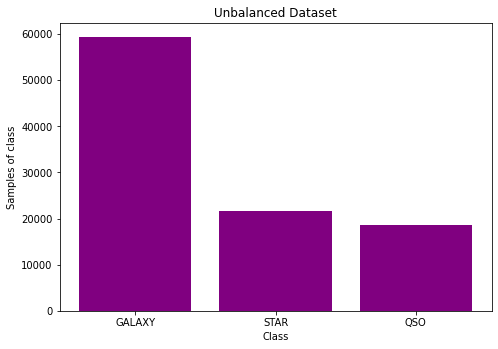

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['GALAXY', 'STAR', 'QSO']
students = [59445, 21594, 18691]
plt.title('Unbalanced Dataset')
plt.xlabel('Class')
plt.ylabel('Samples of class')
ax.bar(langs,students,color='purple')
plt.show()

In [ ]:
def launch_fe(data):
    import os
    import pandas as pd
    from io import StringIO
    import json
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.feature_extraction import text
    import pickle
    from scipy import sparse
    MAX_TEXT_FEATURES = 200
    columns_list = ["rerun_ID", "cam_col", "class", "obj_ID", "alpha", "delta", "u", "g", "r", "i", "z", "run_ID", "field_ID", "spec_obj_ID", "redshift", "plate", "MJD", "fiber_ID"]

    dataset = pd.read_csv(data, skipinitialspace=True)
    num_samples = len(dataset)

    # Encode labels into numbers starting with 0
    label = "class"
    tmpCol = dataset[label].astype('category')
    dict_encoding = { label: dict(enumerate(tmpCol.cat.categories))}
    # Save the model
    model_name = "c50fd75e-d6ab-4542-a28a-0725ea220672"
    fh = open(model_name, "wb")
    pickle.dump(dict_encoding, fh)
    fh.close()

    label = "class"
    dataset[label] = tmpCol.cat.codes

    # Move the label column
    cols = list(dataset.columns)
    colIdx = dataset.columns.get_loc("class")
    # Do nothing if the label is in the 0th position
    # Otherwise, change the order of columns to move label to 0th position
    if colIdx != 0:
        cols = cols[colIdx:colIdx+1] + cols[0:colIdx] + cols[colIdx+1:]
        dataset = dataset[cols]

    # split dataset into train and test
    train, test = train_test_split(dataset, test_size=0.2, random_state=42)

    # Write train and test csv
    train.to_csv('train.csv', index=False, header=False)
    test.to_csv('test.csv', index=False, header=False)
    column_names = list(train.columns)
def get_model_id():
    return "c50fd75e-d6ab-4542-a28a-0725ea220672"


In [ ]:

# Upload a correct file from your local machine
from io import BytesIO
from google.colab import files
uploaded_file = files.upload()
for name in uploaded_file.keys():
    filename = name
data = BytesIO(uploaded_file[filename])


Saving balanced_star_classification.csv to balanced_star_classification.csv


In [ ]:

# Launch FE
launch_fe(data)


In [ ]:

# import the library of the algorithm
from sklearn.svm import LinearSVC

# Initialize hyperparams
tol = 1
fit_intercept = True
max_iter = 100

# Initialize the algorithm
model = LinearSVC(random_state=0, tol=tol, fit_intercept=fit_intercept, max_iter=max_iter)


In [ ]:
from sklearn.svm import LinearSVC
SVC_hyper_params = [0.01,0.1,1,10]
maxiumum_iterations = [1,10,100,10000]
for y in maxiumum_iterations:
  for x in SVC_hyper_params:
    model = LinearSVC(tol=x, max_iter=y)
    model.fit(train.iloc[:,1:],train.iloc[:,0])
    score = model.score(test.iloc[:,1:],test.iloc[:,0])
    acuraccy = score*100
    print('Accuracy of the model:', acuraccy, 'For max_iter:', y, 'Tol:',x)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of the model: 32.073481585655266 For max_iter: 1 Tol: 0.01
Accuracy of the model: 33.87536257361343 For max_iter: 1 Tol: 0.1
Accuracy of the model: 41.12683484222554 For max_iter: 1 Tol: 1


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of the model: 34.09510415751077 For max_iter: 1 Tol: 10


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of the model: 33.87536257361343 For max_iter: 10 Tol: 0.01
Accuracy of the model: 32.62723037707656 For max_iter: 10 Tol: 0.1


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of the model: 33.87536257361343 For max_iter: 10 Tol: 1


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of the model: 30.16612463742639 For max_iter: 10 Tol: 10


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of the model: 33.90173156368111 For max_iter: 100 Tol: 0.01


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of the model: 27.08974246286367 For max_iter: 100 Tol: 0.1


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of the model: 47.42902346840116 For max_iter: 100 Tol: 1


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of the model: 46.93680232047113 For max_iter: 100 Tol: 10


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of the model: 33.87536257361343 For max_iter: 10000 Tol: 0.01


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of the model: 33.831414256833966 For max_iter: 10000 Tol: 0.1


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of the model: 32.62723037707656 For max_iter: 10000 Tol: 1
Accuracy of the model: 33.49740704931001 For max_iter: 10000 Tol: 10


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:

import pandas as pd
# Load the test and train datasets
train = pd.read_csv('train.csv', skipinitialspace=True, header=None)
test = pd.read_csv('test.csv', skipinitialspace=True, header=None)
model = LinearSVC(tol=1, max_iter=100)
# Train the algorithm
model.fit(train.iloc[:,1:], train.iloc[:,0])


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=100, tol=1)

In [ ]:
def encode_confusion_matrix(confusion_matrix):
    import pickle
    encoded_matrix = dict()
    object_name = get_model_id()
    file_name = open(object_name, 'rb')
    dict_encoding = pickle.load(file_name)
    labels = list(dict_encoding.values())[0]
    for row_indx, row in enumerate(confusion_matrix):
        encoded_matrix[labels[row_indx]] = {}
        for item_indx, item in enumerate(row):
            encoded_matrix[labels[row_indx]][labels[item_indx]] = item
    return encoded_matrix


In [ ]:

# Predict the class labels
y_pred = model.predict(test.iloc[:,1:])
# import the library to calculate confusion_matrix
from sklearn.metrics import confusion_matrix
# calculate confusion matrix
confusion_matrix = confusion_matrix(test.iloc[:,0], y_pred)
encoded_matrix = encode_confusion_matrix(confusion_matrix)
print('Confusion matrix of the model is: ', encoded_matrix)
# calculate accuracy
score = model.score(test.iloc[:, 1:], test.iloc[:, 0])
# The value is returned as a decimal value between 0 and 1
# converting to percentage
accuracy = score * 100
print('Accuracy of the model is: ', accuracy)


Confusion matrix of the model is:  {'GALAXY': {'GALAXY': 0, 'QSO': 2409, 'STAR': 1445}, 'QSO': {'GALAXY': 0, 'QSO': 3210, 'STAR': 601}, 'STAR': {'GALAXY': 0, 'QSO': 1545, 'STAR': 2167}}
Accuracy of the model is:  47.262019864639186


Text(27.499999999999996, 0.5, 'True')

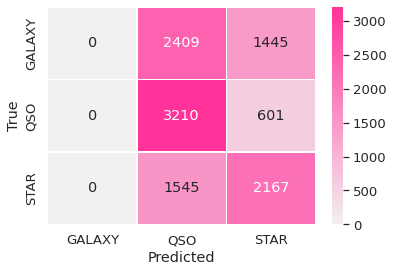

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
sortedlabels=model.classes_
cm = pd.DataFrame(confusion_matrix, index=sortedlabels, columns=sortedlabels)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(font_scale=1.2)
x_axis_labels = ["GALAXY","QSO","STAR"] # labels for x-axis
y_axis_labels = ["GALAXY","QSO","STAR"] # labels for y-axis
sns.heatmap(cm,linewidths=0.5,cmap=sns.light_palette((1,0.2,0.6), n_colors=10000), fmt='g',xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:

# fe_transform function traansforms raw data into a form the model can consume
print('Below is the prediction stage of the AI')
def fe_transform(data_dict, object_path=None):
    import os
    import pandas as pd
    from io import StringIO
    import json
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.feature_extraction import text
    import pickle
    from scipy import sparse
    
    dataset = pd.DataFrame([data_dict])

    return dataset
def encode_label_transform_predict(prediction):
    import pickle
    encoded_prediction = prediction
    label = "class"
    object_name = "c50fd75e-d6ab-4542-a28a-0725ea220672"
    file_name = open(object_name, 'rb')
    dict_encoding = pickle.load(file_name)
    label_name = list(dict_encoding.keys())[0]
    encoded_prediction = \
        dict_encoding[label_name][int(prediction)]
    print(encoded_prediction)
def get_labels(object_path=None):
    label_names = []
    label_name = list(dict_encoding.keys())[0]
    label_values_dict = dict_encoding[label_name]
    for key, value in label_values_dict.items():
        label_names.append(str(value))


Below is the prediction stage of the AI


In [ ]:

test_sample = {'obj_ID': 1.23766323632518e+18, 'alpha': 180.00266879944, 'delta': 32.6821601350916, 'u': -4983.109305, 'g': -4983.69888, 'r': 19.59809, 'i': 20.8056865, 'z': -4985.104725, 'run_ID': 4135.5, 'rerun_ID': 301, 'cam_col': 4, 'field_ID': 500.0, 'spec_obj_ID': 7.213259948368224e+18, 'redshift': 3.5021909085, 'plate': 6406.5, 'MJD': 55270.0, 'fiber_ID': 500.5}
# Call FE on test_sample
test_sample_modified = fe_transform(test_sample)
# Make a prediction
prediction = model.predict(test_sample_modified)
encode_label_transform_predict(prediction)


QSO


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(
